In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from netgraph import Graph

import numpy as np
import pandas as pd

# Clustering Coefficients

**Triad closure:** Tendency for people sharing connectings in a social network to become connected

Used for Edge prediction: edges that close triangles are likely to appear in a future time step mbut how about untimed or static networks?)

**Local clustering coefficient (of a node) / LLC:** Fraction of pairs of the node's friends that are friends with each other 

= # of pairs of C's friends who are friends / # of pairs of C's friends

In [4]:
G = nx.Graph()

G.add_edges_from([('A', 'K'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'K'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('I', 'J')])

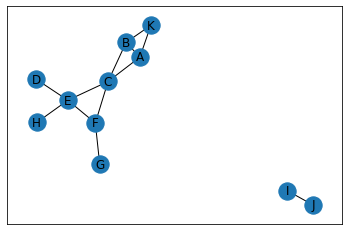

In [5]:
nx.draw_networkx(G)

Use `nx.clustering` to compute a node's local clustering coefficient

In [10]:
nx.clustering(G, 'F'), nx.clustering(G, 'E'), nx.clustering(G, 'A'), nx.clustering(G, 'I')

(0.3333333333333333, 0.16666666666666666, 0.6666666666666666, 0)

Measuring clustering over a network:
* Averaging the local clustering coefficient of each node
* Counting the percentage of "open triads" in the network (3 nodes that have two edges among them)

**Transitivity**: 3 * number of closed triads / number of open triads

In [11]:
nx.transitivity(G)

0.4090909090909091

<div class="alert alert-info">
Both Transitivity and Average Clustering Coefficient measure the tendency for edges to form triangles. Transitivity weighs nodes with large degress higher
</div>

In [ ]:
<img src='img/transitivity_vs_ac'